In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load combined dataset
combined_data = pd.read_csv("data/combined_stats.csv")
combined_data

,game_id,season,week,temp,wind,calendar_week,focus_team,focus_score,focus_temp_delta,did_win,avg_temp,attempts,carries,passing_epa,rushing_epa,conventional_plays_ran,pass_to_run_ratio
0,2015_01_PIT_NE,2015,1,65.0,7.0,37,NE,28,-1.093469,True,66.093469,32,24,15.961351,-0.252627,56,1.333333
1,2015_01_IND_BUF,2015,1,56.0,15.0,37,BUF,27,-9.687551,True,65.687551,19,36,9.972638,-2.539012,55,0.527778
2,2015_01_GB_CHI,2015,1,72.0,11.0,37,CHI,23,2.529143,False,69.470857,36,33,0.229273,7.547915,69,1.090909
3,2015_01_KC_HOU,2015,1,70.0,0.0,37,HOU,20,0.000000,False,70.000000,47,21,-6.469611,-4.144401,68,2.238095
4,2015_01_CAR_JAX,2015,1,77.0,7.0,37,JAX,9,-2.510000,False,79.510000,40,21,-15.522407,-0.896787,61,1.904762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,2024_18_KC_DEN,2024,18,28.0,5.0,1,KC,0,-1.048000,False,29.048000,17,11,-10.174690,-4.639490,28,1.545455
4900,2024_18_SEA_LA,2024,18,70.0,0.0,1,SEA,30,27.069714,True,42.930286,27,24,9.838861,2.883957,51,1.125000
4901,2024_18_LAC_LV,2024,18,70.0,0.0,1,LAC,34,0.000000,True,70.000000,36,35,17.740903,-0.007130,71,1.028571
4902,2024_18_MIA_NYJ,2024,18,34.0,10.0,1,MIA,20,-35.752527,False,69.752527,41,23,-6.921629,1.915941,64,1.782609


In [3]:
combined = combined_data.dropna(subset=["focus_temp_delta","avg_temp"]) # TODO dropping null rows (STL, OAK, and SD without data) for now 


combined["total_epa"] = combined["passing_epa"] + combined["rushing_epa"] # Adding Total EPA to analyze
combined

,game_id,season,week,temp,wind,calendar_week,focus_team,focus_score,focus_temp_delta,did_win,avg_temp,attempts,carries,passing_epa,rushing_epa,conventional_plays_ran,pass_to_run_ratio,total_epa
0,2015_01_PIT_NE,2015,1,65.0,7.0,37,NE,28,-1.093469,True,66.093469,32,24,15.961351,-0.252627,56,1.333333,15.708723
1,2015_01_IND_BUF,2015,1,56.0,15.0,37,BUF,27,-9.687551,True,65.687551,19,36,9.972638,-2.539012,55,0.527778,7.433625
2,2015_01_GB_CHI,2015,1,72.0,11.0,37,CHI,23,2.529143,False,69.470857,36,33,0.229273,7.547915,69,1.090909,7.777188
3,2015_01_KC_HOU,2015,1,70.0,0.0,37,HOU,20,0.000000,False,70.000000,47,21,-6.469611,-4.144401,68,2.238095,-10.614012
4,2015_01_CAR_JAX,2015,1,77.0,7.0,37,JAX,9,-2.510000,False,79.510000,40,21,-15.522407,-0.896787,61,1.904762,-16.419194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,2024_18_KC_DEN,2024,18,28.0,5.0,1,KC,0,-1.048000,False,29.048000,17,11,-10.174690,-4.639490,28,1.545455,-14.814180
4900,2024_18_SEA_LA,2024,18,70.0,0.0,1,SEA,30,27.069714,True,42.930286,27,24,9.838861,2.883957,51,1.125000,12.722818
4901,2024_18_LAC_LV,2024,18,70.0,0.0,1,LAC,34,0.000000,True,70.000000,36,35,17.740903,-0.007130,71,1.028571,17.733773
4902,2024_18_MIA_NYJ,2024,18,34.0,10.0,1,MIA,20,-35.752527,False,69.752527,41,23,-6.921629,1.915941,64,1.782609,-5.005688


In [4]:
def plot_hist(df, key, xtitle, title="Distribution of Temperature in NFL Games", ax=None, num_bins=30, c=None):
    if ax is None:
        fig, ax = plt.subplots()
    num_bins = num_bins
    counts, bins = np.histogram(df[key], num_bins)
    probs = counts / counts.sum()
    ax.bar(bins[:-1], probs, width=np.diff(bins), align="edge", color=c)
    
    ax.set_xlabel(xtitle)
    ax.set_ylabel("Fraction of Games")
    ax.set_title(title)

# Visualize the Data

We first try to visualize what the temperature game distribution looks like

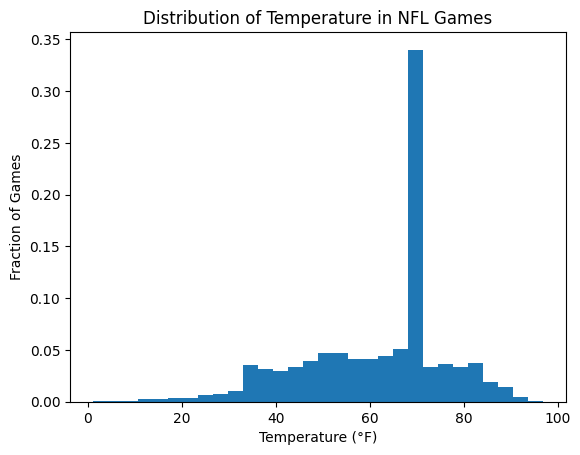

In [5]:
#General plot visualizaing temperature delta distribution
df = combined
key = "temp"
xtitle = "Temperature (°F)"
plot_hist(df, key, xtitle)

The immediate noticeable trend is the large number of games that occur at 70 degrees. This is an artifact of how we defaulted closed-stadium games at 70 degrees. If we ignore 70 closed-stadium games (seen as a sort of control in our data set), we can focus in on our impacts

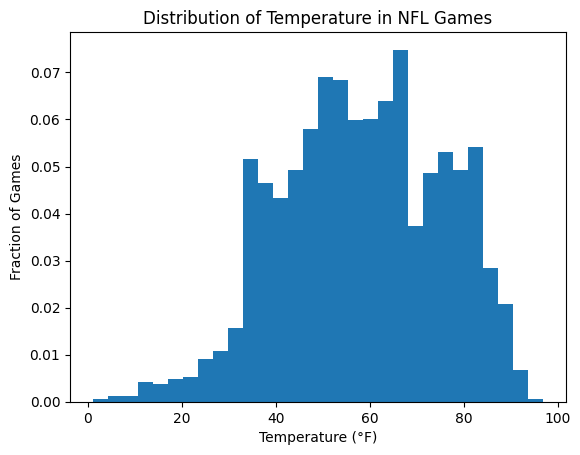

In [6]:
non_70 = combined[~(combined["temp"] == 70)]

plot_hist(non_70, "temp", "Temperature (°F)")

When we ignore the 70 degrees, we can see that most games occur between about 35 degrees and 85 degrees
In these temperature ranges, we want to see some average stats for each temperature bracket

In [7]:
def plot_stats(df, key, temp_min, temp_max, temp_step, ymax=7):
    num_bins = 5
    
    temps = range(temp_min, temp_max + temp_step, temp_step)
    xs, passing_epas, rushing_epas, pr_ratios, scores = [], [], [], [], []
    for i, temp in enumerate(temps):
        if i == len(temps) - 1:
            break
        x = (temps[i] + temps[i+1]) / 2
        xs.append(x)
        sub_df = df[(df[key] > temps[i]) & (df[key] <= temps[i+1])]
        if len(sub_df) == 0:
            y = 0
            z = 0
            h = 0
            s = 0
        else:
            y = sub_df["passing_epa"].sum() / len(sub_df)
            z = sub_df["rushing_epa"].sum() / len(sub_df)
            h = sub_df["pass_to_run_ratio"].sum() / len(sub_df)
            s = sub_df["focus_score"].sum() / len(sub_df)
        passing_epas.append(y)
        rushing_epas.append(z)
        pr_ratios.append(h)
        scores.append(s)

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    ax1.bar(xs, passing_epas, width=temp_step, edgecolor="k")
    ax1.set_xlabel("Temperature (°F)")
    ax1.set_ylabel("Average Passing EPA")
    ax1.set_ylim(-ymax, ymax)
    ax2.bar(xs, rushing_epas, width=temp_step, edgecolor="k")
    ax2.set_xlabel("Temperature (°F)")
    ax2.set_ylabel("Average Rushing EPA")
    ax2.set_ylim(-ymax, ymax)
    ax3.bar(xs, pr_ratios, width=temp_step, edgecolor="k")
    ax3.set_xlabel("Temperature (°F)")
    ax3.set_ylabel("Average Pass-to-Run Ratios")
    ax4.bar(xs, scores, width=temp_step, edgecolor="k")
    ax4.set_xlabel("Temperature (°F)")
    ax4.set_ylabel("Average Scores")
    fig.tight_layout()

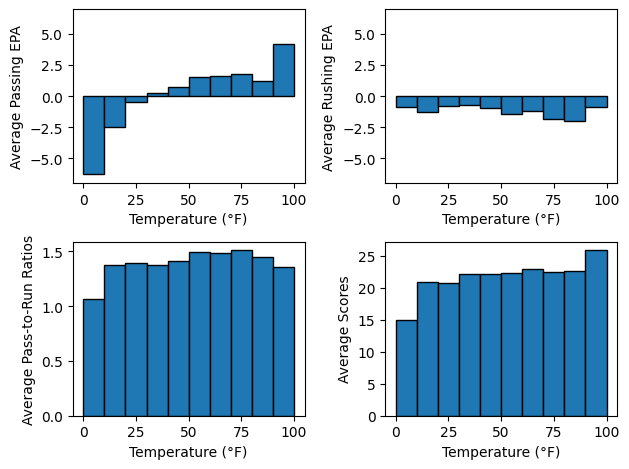

In [8]:
df = non_70

key = "temp"
temp_min = 0
temp_max = 100
temp_step = 10

num_bins = 10

plot_stats(df, key, temp_min, temp_max, temp_step)

Something we note is that at lower temperatures, it seems that Passing EPAs are negative, Rushing EPAs are "best", Pass-to-Run ratios are more run-heay, and scores are lower. This follows the trends that passing is harder at freezing temperatures

When we focus on winter games, this is what we see

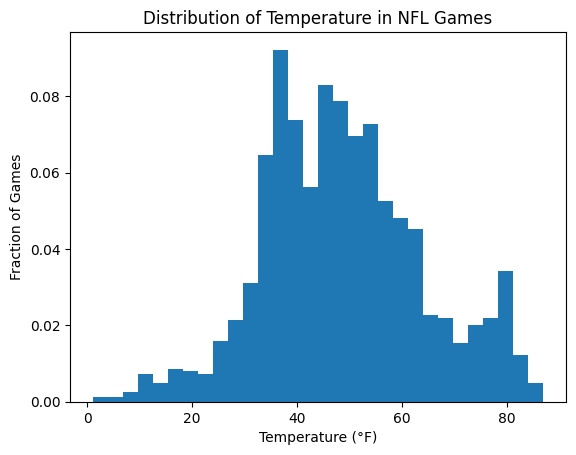

In [9]:
df = non_70
df = df[((df["calendar_week"] > 45) | (df["calendar_week"] < 15))]

plot_hist(df, "temp", "Temperature (°F)")

The average temperature shifts left with the cooling temperatures, but you get a second mini hump on the right (probably due to "warm" teams not cooling down)

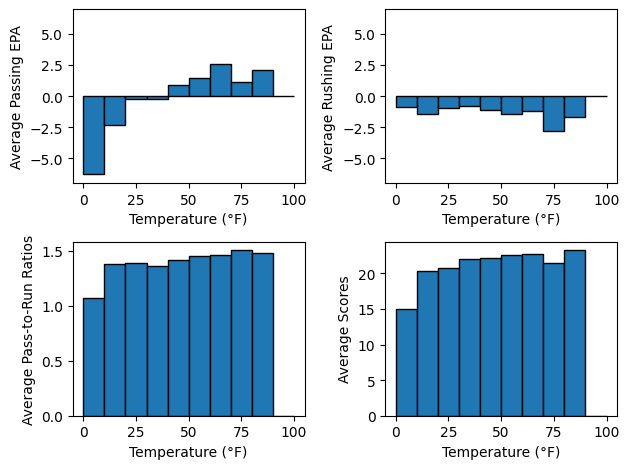

In [10]:
key = "temp"
temp_min = 0
temp_max = 100
temp_step = 10

num_bins = 10

plot_stats(df, key, temp_min, temp_max, temp_step)

Once again all of our trends remain the same

One of our hypotheses was that the "temperature-delta" also has these same trends rather than just temperature.
Certain teams may be impacted by them more than others, such as Miami playing much colder than their average

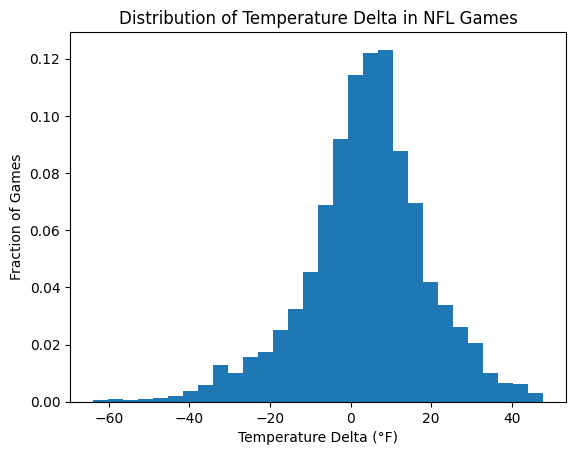

In [11]:
non_zero = combined[~(combined["focus_temp_delta"] == 0)]
plot_hist(non_zero, "focus_temp_delta", "Temperature Delta (°F)", "Distribution of Temperature Delta in NFL Games")

Here if we ignore 0 (for the same closed-stadium control difference), our distribution looks a lot more normal

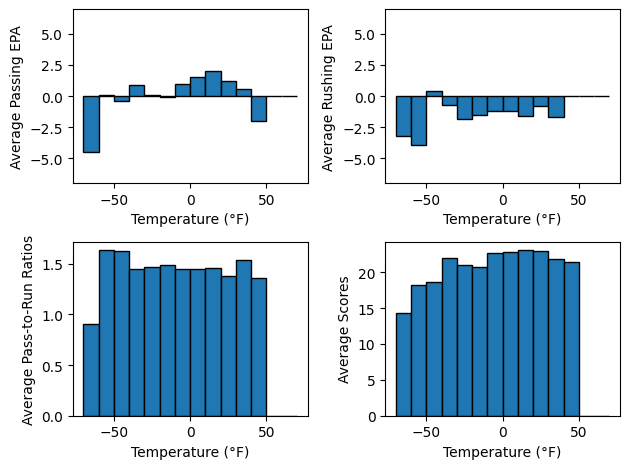

In [12]:
df = non_zero
key = "focus_temp_delta"
temp_min = -70
temp_max = 70
temp_step = 10

num_bins = 20

plot_stats(df, key, temp_min, temp_max, temp_step)

When we focus on temperature delta, it seems that our trends change a bit. Now when we look at low temperatures, both Passing EPAs and Rushing EPAs are minimized. This seems to buck the trend that we saw for general cases when it comes to rushing EPA. When looking at high temperature deltas, we also see some struggles when it comes to Passing EPAs which is not apparent in the raw "temperature case"

This means that teams that play at greater extremes face greater challenges than the general trends.

Once again, focusing on winter games

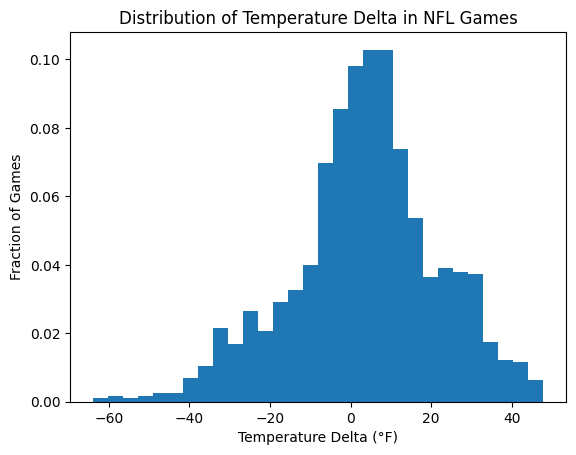

In [13]:
df = combined[~(combined["focus_temp_delta"] == 0)]
df = df[((df["calendar_week"] > 45) | (df["calendar_week"] < 15))]
plot_hist(df, "focus_temp_delta", "Temperature Delta (°F)", "Distribution of Temperature Delta in NFL Games")

The general shape changes with what looks like a "growth" on the right side

Plotting our stats quad

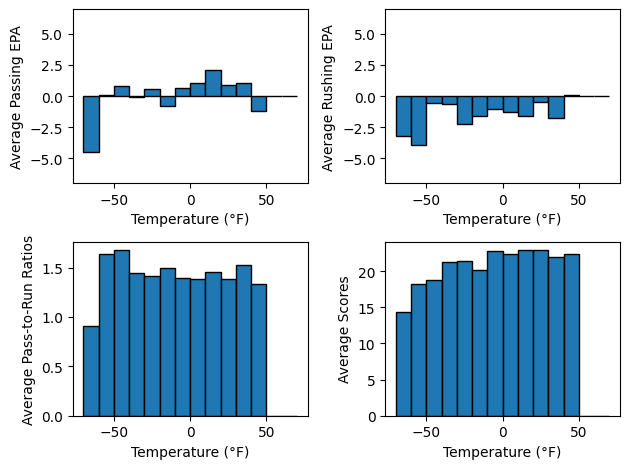

In [14]:
key = "focus_temp_delta"
temp_min = -70
temp_max = 70
temp_step = 10

num_bins = 20

plot_stats(df, key, temp_min, temp_max, temp_step)

When looking at the winter games only, we seee that the Passing EPA trends hold but the Rushing EPAs change again.
When teams are playing much colder than their average, the rushing EPA nose dives, but when playing much warmer than their average, the average rushing EPA tends slightly positive.

Some reasons for this might be based on how the temperature delta is defined. "Cold" teams like BUF will almost never play games with very negative temperature deltas, and "warm" teams like MIA almost never play games with very positive temperature deltas.

So the very negative could mean MIA traveling to BUF and playing in freezing temperatures while very positive could mean BUF traveling to MIA and playing at Miami's winter temperatures. The other outlier teams involve "closed-stadium" teams playing cold open stadium teams in the winter.
These outliers occur most prevalently in the AFC East with MIA traveling to BUF, NE, or NYJ or the NFC North where 2 "closed-stadium" teams in DET and MIN travel to GB and CHI.

It will be interesting to explore the differences that MIA faces where the players are "used" to warmer temperatures even outside of stadium while DET and MIN are very cold places in general.

# Temp Delta vs Scoring

In [15]:
def ax_scatter(ax, df, x, y, c):
    ax.scatter(df[x], df[y], alpha=0.3, color=c)

In [16]:
def plot_stats_team(team, df, key, temp_min, temp_max, temp_step, ymax=7):
    num_bins = 5

    df_win = df[df["did_win"]]
    df_lose = df[~(df["did_win"])]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    # fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
    fig.suptitle(f"{team} Performance Metrics", fontsize=16)
    plot_hist(df_win, "focus_temp_delta", "Temperature Delta(°F)", ax=ax1, title="", c="g", num_bins=10)
    ax1.set_ylim(0, 0.35)
    ax1.set_title("Wins over Temp. Delta")
    plot_hist(df_lose, "focus_temp_delta", "Temperature Delta(°F)", ax=ax2, title="", c="r", num_bins=10)
    ax2.set_ylim(0, 0.35)
    ax2.set_title("Losses over Temp. Delta")

    for ax in [ax1, ax2]:
        ax.set_xlim(-70, 70)

    fig.tight_layout()

In [17]:
key = "focus_temp_delta"
temp_min = -70
temp_max = 70
temp_step = 10

# Non-zero delta (ignoring closed stadiums)
df = combined[~(combined["focus_temp_delta"] == 0)]
# Focusing on winter games
df = df[((df["calendar_week"] > 45) | (df["calendar_week"] < 15))]


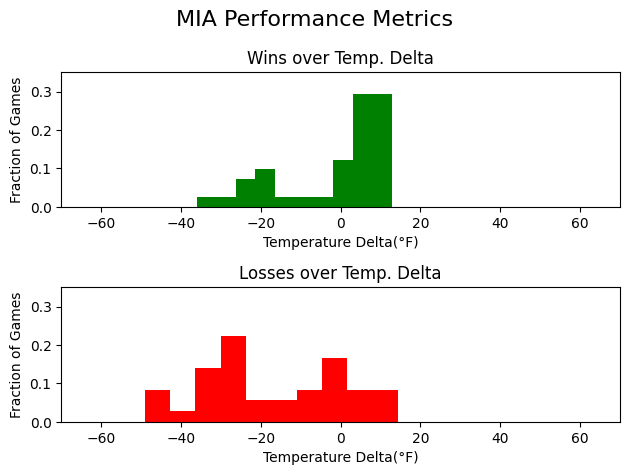

In [18]:
team = "MIA"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)

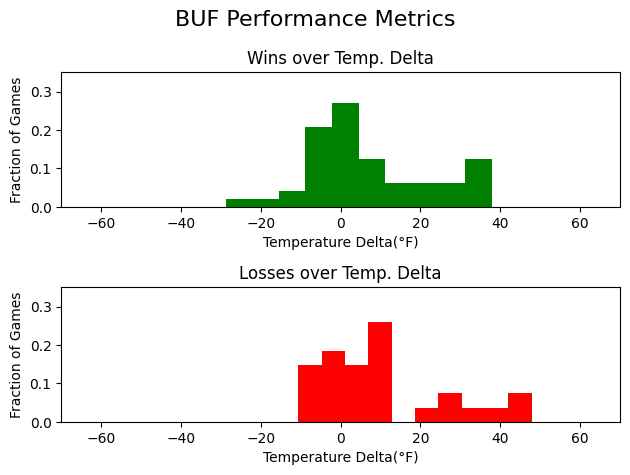

In [19]:
team = "BUF"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)

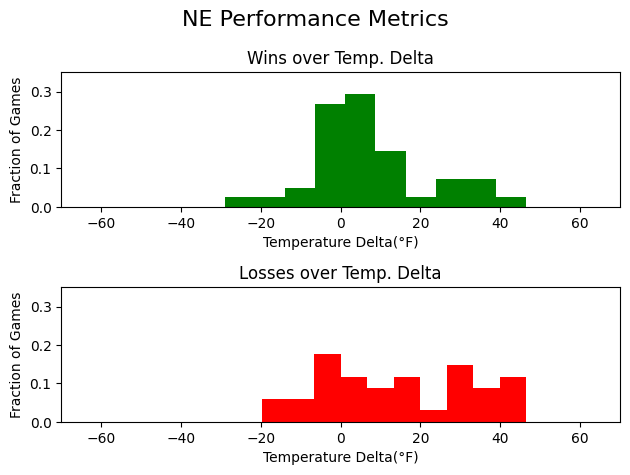

In [20]:
team = "NE"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)

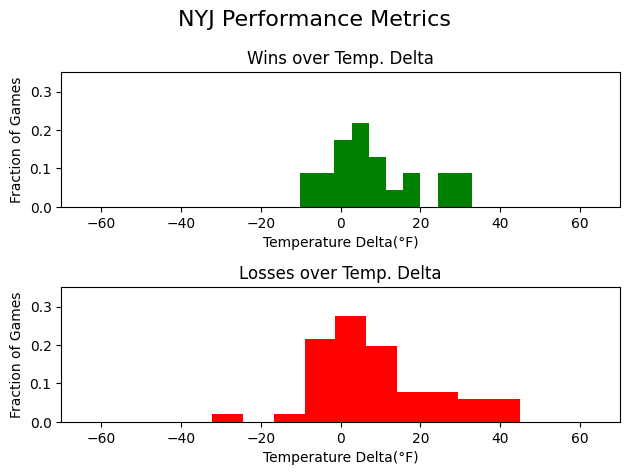

In [21]:
team = "NYJ"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)

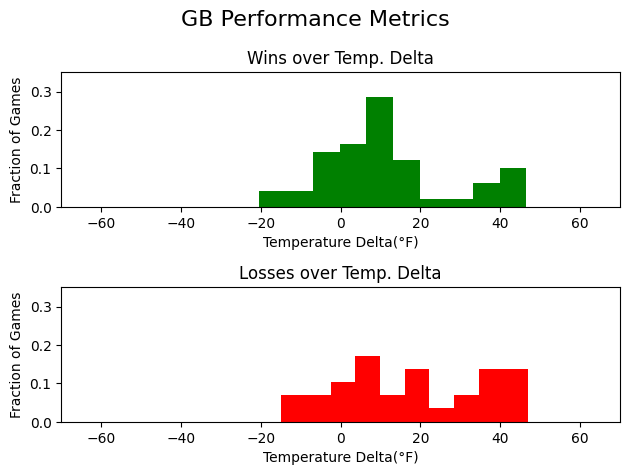

In [22]:
team = "GB"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)

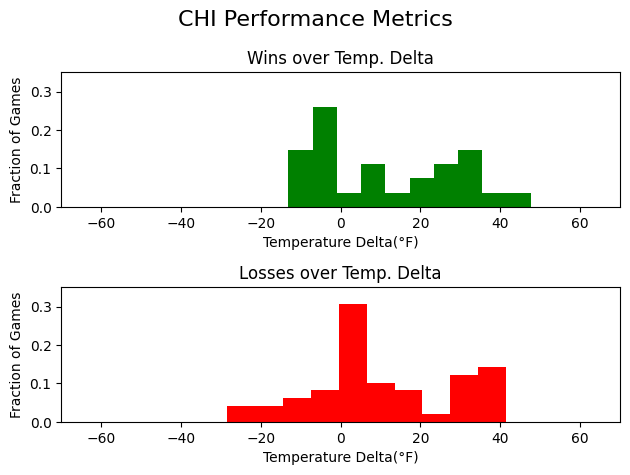

In [23]:
team = "CHI"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)

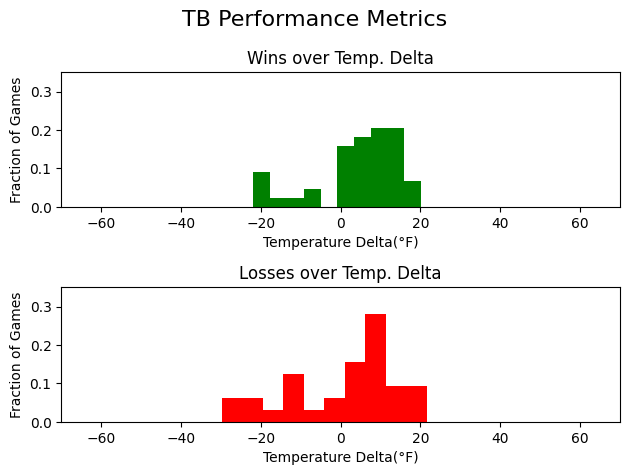

In [24]:
team = "TB"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)

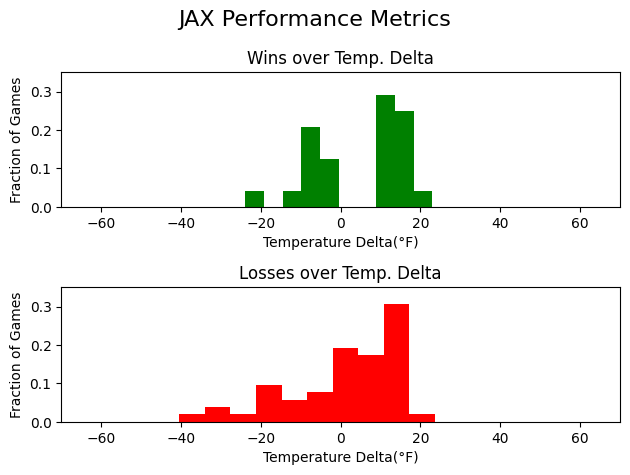

In [25]:
team = "JAX"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)

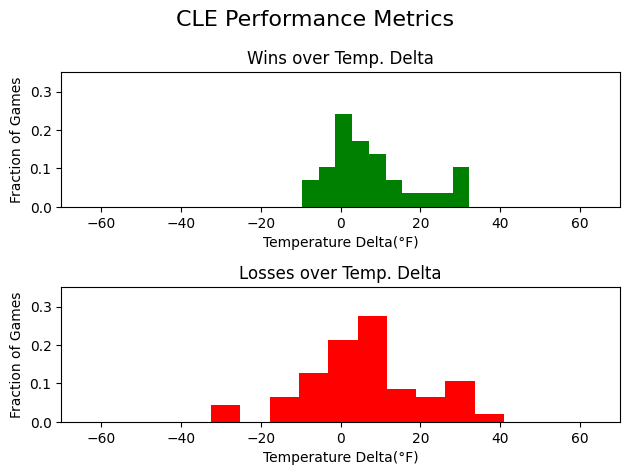

In [26]:
team = "CLE"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)

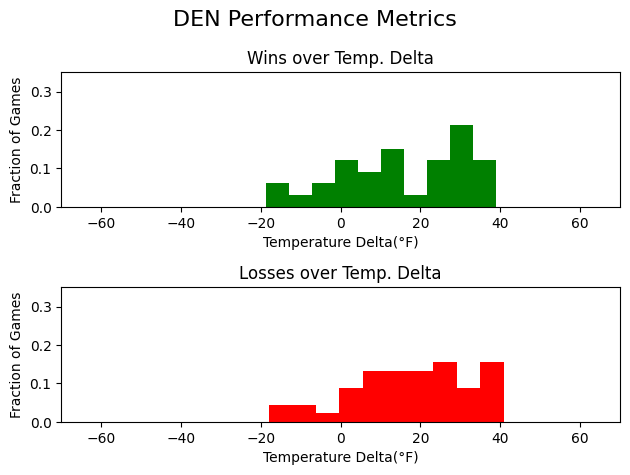

In [27]:
team = "DEN"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)

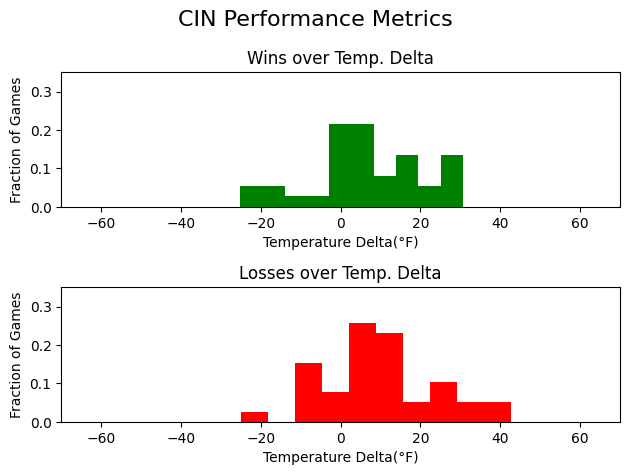

In [28]:
team = "CIN"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)

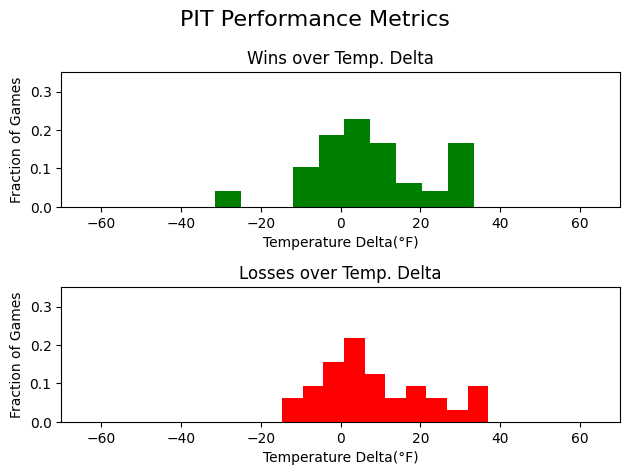

In [29]:
team = "PIT"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)

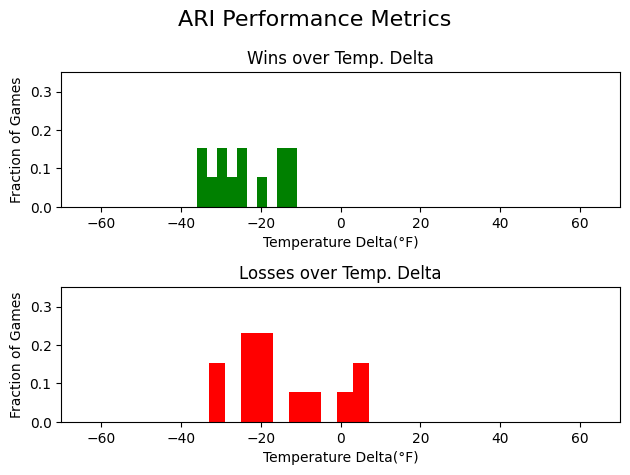

In [30]:
team = "ARI"
tdf = df[df["focus_team"] == team]
plot_stats_team(team, tdf, key, temp_min, temp_max, temp_step)